In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from datetime import datetime
import datetime as dt
from itertools import combinations

In [2]:
# Importing test data 1
df1 = pd.read_csv("./testdata_exercise1.csv", header = None)
col_names1 = ['surgeon', 'notification_time']
df1.columns = col_names1
df1.head(5)

,surgeon,notification_time
0,user4,06:39:22
1,user3,08:31:20
2,user3,14:22:14
3,user1,20:22:44
4,user3,06:02:54


In [3]:
# Assigning each notification time to the hour of the day
df1['hour'] = (pd.to_timedelta(df1['notification_time']).astype('timedelta64[h]').astype(int))
df1['hour'] = df1['hour']
df1.head(5)

,surgeon,notification_time,hour
0,user4,06:39:22,6
1,user3,08:31:20,8
2,user3,14:22:14,14
3,user1,20:22:44,20
4,user3,06:02:54,6


In [4]:
# Grouping the number of notifications by hour and by surgeon
df1_count = df1.groupby(['surgeon','hour']).count()
df1_count = df1_count.reset_index()
df1_count = df1_count.rename(columns={'notification_time':'count'})
df1_count

,surgeon,hour,count
0,user0,3,1
1,user0,4,2
2,user0,5,4
3,user0,6,1
4,user0,7,1
...,...,...,...
128,user7,12,16
129,user7,13,15
130,user7,14,8
131,user7,15,12


In [5]:
# Now to create a 24 length vector for each surgeon that prints the number of notifications in each hour
# The vector will also be normalised
def foo(user, df):
    user_df = df[df['surgeon']==user]
    user_his = np.zeros(24)
    
    for index, row in user_df.iterrows():
        hour = row['hour']
        count = row['count']
        user_his[hour] = count
    
    tot = user_his.sum()
    norm = user_his/tot
    
    return norm

foo('user0', df1_count)

array([0.     , 0.     , 0.     , 0.03125, 0.0625 , 0.125  , 0.03125,
       0.03125, 0.03125, 0.0625 , 0.     , 0.125  , 0.     , 0.09375,
       0.     , 0.03125, 0.0625 , 0.03125, 0.09375, 0.03125, 0.03125,
       0.09375, 0.03125, 0.     ])

In [6]:
# Create a dictionary with the normalised vectors for each surgeon
df1_24hr = {}

In [7]:
for user in df1_count['surgeon'].unique():
    value = foo(user, df1_count)
    df1_24hr[user] = value

In [8]:
df1_24hr

{'user0': array([0.     , 0.     , 0.     , 0.03125, 0.0625 , 0.125  , 0.03125,
        0.03125, 0.03125, 0.0625 , 0.     , 0.125  , 0.     , 0.09375,
        0.     , 0.03125, 0.0625 , 0.03125, 0.09375, 0.03125, 0.03125,
        0.09375, 0.03125, 0.     ]),
 'user1': array([0.03614458, 0.06024096, 0.03614458, 0.01204819, 0.03614458,
        0.01204819, 0.03614458, 0.02409639, 0.02409639, 0.01204819,
        0.04819277, 0.        , 0.        , 0.10843373, 0.20481928,
        0.09638554, 0.03614458, 0.        , 0.04819277, 0.02409639,
        0.07228916, 0.01204819, 0.01204819, 0.04819277]),
 'user2': array([0.        , 0.        , 0.01960784, 0.03921569, 0.05882353,
        0.01960784, 0.03921569, 0.07843137, 0.        , 0.03921569,
        0.03921569, 0.01960784, 0.07843137, 0.03921569, 0.03921569,
        0.03921569, 0.01960784, 0.01960784, 0.01960784, 0.25490196,
        0.1372549 , 0.        , 0.        , 0.        ]),
 'user3': array([0.04545455, 0.03030303, 0.01515152, 0.06060606

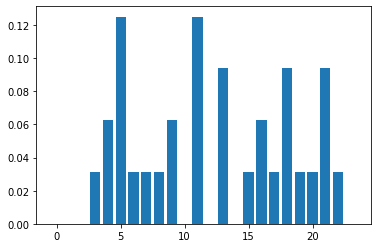

In [9]:
# Example of normalised histogram for surgeon user0
plt.bar(x=np.arange(len(df1_24hr['user0'])), height=df1_24hr['user0'])
plt.show()

In [10]:
# KL divergence function
def KL(P,Q):
    epsilon = 0.00001
    P = P+epsilon
    Q = Q+epsilon

    divergencepq = np.sum(P*np.log(P/Q))
    divergenceqp = np.sum(Q*np.log(Q/P))
    # added to ensure symmetry
    return "%.2f" % (divergencepq + divergenceqp)

In [11]:
# Program to find the 2 most similar users

In [12]:
print(df1_count['surgeon'].unique())

['user0' 'user1' 'user2' 'user3' 'user4' 'user5' 'user6' 'user7']


In [13]:
all_combs = []

In [14]:
# List of unique surgeons
surgeon = df1_count['surgeon'].unique()

In [15]:
for combo in combinations(surgeon, 2):
    all_combs += [combo]

In [16]:
user_df = pd.DataFrame(columns = ['Surgeon1','Surgeon2','DL score'])

In [17]:
# Create a dataframe with the surgeon combinations and their similarity scores
sim_dict = {'Surgeon1':[],'Surgeon2':[],'DL score':[]}
for comb in all_combs:
    sim = KL(df1_24hr[comb[0]], df1_24hr[comb[1]])
    sim_dict['Surgeon1'].append(comb[0])
    sim_dict['Surgeon2'].append(comb[1])
    sim_dict['DL score'].append(sim)

In [18]:
user_df = pd.DataFrame(sim_dict)
user_df.head()

,Surgeon1,Surgeon2,DL score
0,user0,user1,6.12
1,user0,user2,4.16
2,user0,user3,4.22
3,user0,user4,5.62
4,user0,user5,6.74


In [19]:
user_df['DL score'] = user_df['DL score'].astype(float)

In [20]:
# Print pair of users with min KL divergence (max similarity)
user_df[user_df['DL score'] == user_df['DL score'].min()]

,Surgeon1,Surgeon2,DL score
27,user6,user7,0.1


In [21]:
# Question 2 - load dataset

df2 = pd.read_csv("./testdata_exercise2.csv", header = None)
col_names2 = ['surgeon', 'notifications_per_day']
df2.columns = col_names2
df2.head(10)

,surgeon,notifications_per_day
0,user000,105
1,user001,186
2,user002,74
3,user003,193
4,user004,149
5,user005,196
6,user006,160
7,user007,125
8,user008,129
9,user009,5


In [22]:
df2.sort_values(by='notifications_per_day', ascending=False)

,surgeon,notifications_per_day
160,user160,299
284,user284,299
407,user407,298
215,user215,298
490,user490,298
...,...,...
27,user027,3
427,user427,2
298,user298,2
411,user411,1


In [23]:
# This is the standard bubblesort algorithm that sorts an array

def bubbleSort(nums):
    n = len(nums)
    for i in range(n):
        for j in range(0, n - i - 1):
            if nums[j] > nums[j + 1]:
                nums[j], nums[j + 1] = nums[j + 1], nums[j]
    return nums

In [24]:
# This is my bubble sorting algorithm for this pandas dataframe

def bubbleSortDataframe(df):
    n = len(df)
    for i in range(n):
        for j in range(0, n - i - 1):
            if df.iloc[j]['notifications_per_day'] > df.iloc[j + 1]['notifications_per_day']:
                df.iloc[j], df.iloc[j + 1] = df.iloc[j + 1], df.iloc[j]

    return df

In [25]:
# Turning the not_per_day column into an array 
nums = np.array(df2['notifications_per_day'])

In [26]:
# Show the unordered array
print(nums)

[105 186  74 193 149 196 160 125 129   5 139 220  37 217   9  38  27  79
  17  40 287  14 203 197 184 108 238   3 261  51 276 176  24 115  27  98
 121 131 119 229 169 261 243  89 171 192 181  41 236 282  21 139 217 166
 102  86 168 207  35 171 272 213 229  63 130  31 243 181  68 157  29 201
  66 239 277  94   3  84 118 173  92  43 223 269 243 191 275  55 272 198
 215 210 150 181   5  22 197 182  16  21  16  49 164  65  76  76 172 216
 219   5  76 173 294  81  75  85 230  30 189  12 103  31  42 261 241 249
  55 201  55 122 215 244 182  92  45 158 291 253 246 288 260 254   6 170
  35 239 197  32  40 174 145 112 172 255 193 157  34  21 186 218 299  18
   0 194 278  28 142  79  82 114 102  95  22  21  88 216  59 227 227  66
  48 241  32 161 165 227  24 120 196 148 130 239 279 229  94 290  64  63
  70 237  12  23 133 106 121  75 142 202  89 139  44 250 230  24 258 298
 292 295  11  18 177 252 193  23  67  56 152 256 273 159 156 165 218 280
 100 176 140 113  18 140 231 141 159 226 225  18  5

In [27]:
# Sorted array
bubbleSort(nums)

array([  0,   1,   2,   2,   3,   3,   4,   5,   5,   5,   6,   7,   8,
         9,   9,  10,  10,  11,  12,  12,  14,  14,  14,  15,  16,  16,
        16,  17,  18,  18,  18,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  22,  23,  23,  23,  24,  24,  24,  25,  27,  27,  28,
        29,  29,  30,  31,  31,  32,  32,  34,  34,  34,  34,  35,  35,
        35,  36,  37,  38,  39,  40,  40,  41,  41,  42,  42,  42,  43,
        43,  44,  44,  45,  46,  46,  46,  48,  48,  49,  49,  51,  51,
        54,  55,  55,  55,  55,  55,  56,  56,  56,  56,  56,  58,  58,
        59,  60,  60,  61,  62,  63,  63,  63,  63,  64,  64,  64,  64,
        65,  65,  66,  66,  66,  66,  67,  67,  67,  68,  68,  70,  72,
        72,  73,  74,  74,  75,  75,  75,  75,  76,  76,  76,  76,  78,
        79,  79,  79,  80,  80,  81,  81,  82,  83,  83,  84,  85,  86,
        87,  88,  88,  89,  89,  89,  89,  91,  92,  92,  92,  92,  93,
        94,  94,  94,  95,  97,  98,  98,  98,  98,  98,  98, 10

In [28]:
# Sorting the df using bubbleSortDataframe function 
bubbleSortDataframe(df2)

,surgeon,notifications_per_day
0,user162,0
1,user411,1
2,user298,2
3,user427,2
4,user027,3
...,...,...
494,user215,298
495,user407,298
496,user490,298
497,user160,299
